In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight

import matplotlib.pyplot as plt

from xgboost import XGBClassifier


# Necessary to get names out
SimpleImputer.get_feature_names_out = (lambda self, names=None:
                                       self.feature_names_in_)

In [2]:
features_num = [
    "Z_BEST", "z1_median", "u_f", "u_e", "u_e_raw", "Bw_f", "Bw_e", "Bw_e_raw", "R_f", "R_e", 
    "R_e_raw", "I_f", "I_e", "I_e_raw", "z_f", "z_e", "z_e_raw", "z_Subaru_f", "z_Subaru_e", 
    "z_Subaru_e_raw", "y_f", "y_e", "y_e_raw", "J_f", "J_e", "J_e_raw", "H_f", 
    "H_e", "H_e_raw", "K_f", "K_e", "K_e_raw", "Ks_f", "Ks_e", "Ks_e_raw", "ch1_f", "ch1_e", "ch1_e_raw", "ch2_f", 
    "ch2_e", "ch2_e_raw", "ch3_f", "ch3_e", "ch3_e_raw", "ch4_f", "ch4_e", "ch4_e_raw", "MIPS_24_f", 
    "MIPS_24_e", "MIPS_24_e_raw", "PACS_100_f", "PACS_100_e", "PACS_100_e_raw", "PACS_160_f", "PACS_160_e", 
    "PACS_160_e_raw", "SPIRE_250_f", "SPIRE_250_e", "SPIRE_250_e_raw", "SPIRE_350_f", "SPIRE_350_e", "SPIRE_350_e_raw", 
    "SPIRE_500_f", "SPIRE_500_e", "SPIRE_500_e_raw"

]
features_cat_binary = [
    "FLAG_OVERLAP", "XID+_rerun_mips", "XID+_rerun_pacs", "XID+_rerun_SPIRE", "CHANGE_FLAG_ID", 
    "CHANGE_FLAG_ZBEST", "CHANGE_FLAG_DEEP", "CHANGE_FLAG_FIR", "FLAG_GOOD"
]
features_cat_non_binary = [
    "FLAG_DEEP"
]

classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']

In [3]:
# Creating the pipeline
transformer_num = make_pipeline(
    SimpleImputer(strategy="mean"),  # there are a few missing values
    StandardScaler(),
)
# Almost all cat features are already binary, so don't have to be one-hot encoded
transformer_cat_binary = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
)
transformer_cat_non_binary = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False)
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat_binary, features_cat_binary),
    (transformer_cat_non_binary, features_cat_non_binary),
)

In [4]:
data = pd.read_csv("../../../Data/Fangyou_data/Cleaned/Bootes_clean.csv")

In [5]:
# Dropping required columns
X = data
y = data[["AGN_final", "RadioAGN_final"]]

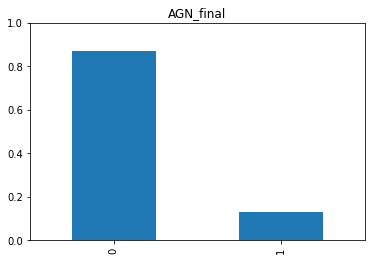

In [47]:
(y["AGN_final"].value_counts()/len(y)).plot(kind='bar', title="AGN_final")
plt.ylim(0,1)
plt.show()

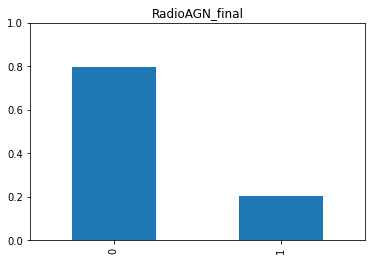

In [48]:
(y["RadioAGN_final"].value_counts()/len(y)).plot(kind='bar', title="RadioAGN_final")
plt.ylim(0,1)
plt.show()

In [6]:
# Creating training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [7]:
# Transforming the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Random forest

## AGN

In [8]:
AGN_random_forest = RandomForestClassifier(n_estimators=100, class_weight="balanced")
AGN_random_forest.fit(X_train, y_train["AGN_final"])

RandomForestClassifier(class_weight='balanced')

In [14]:
labels = np.unique(y_train["AGN_final"])

In [15]:
y_pred_AGN = AGN_random_forest.predict(X_test)
print(accuracy_score(y_test["AGN_final"], y_pred_AGN))

0.9210377890580936


[]

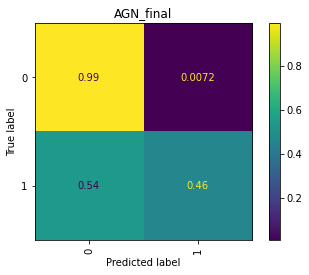

In [13]:
cm = confusion_matrix(y_test["AGN_final"], y_pred_AGN, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.title("AGN_final")
plt.plot()

In [16]:
random_forest_feature_importance = pd.DataFrame(
    np.array([preprocessor.get_feature_names_out(), AGN_random_forest.feature_importances_]).T,
                                               columns=['Feature', 'Importance'])
random_forest_feature_importance = random_forest_feature_importance.sort_values(by=['Importance'], ascending=False)

[]

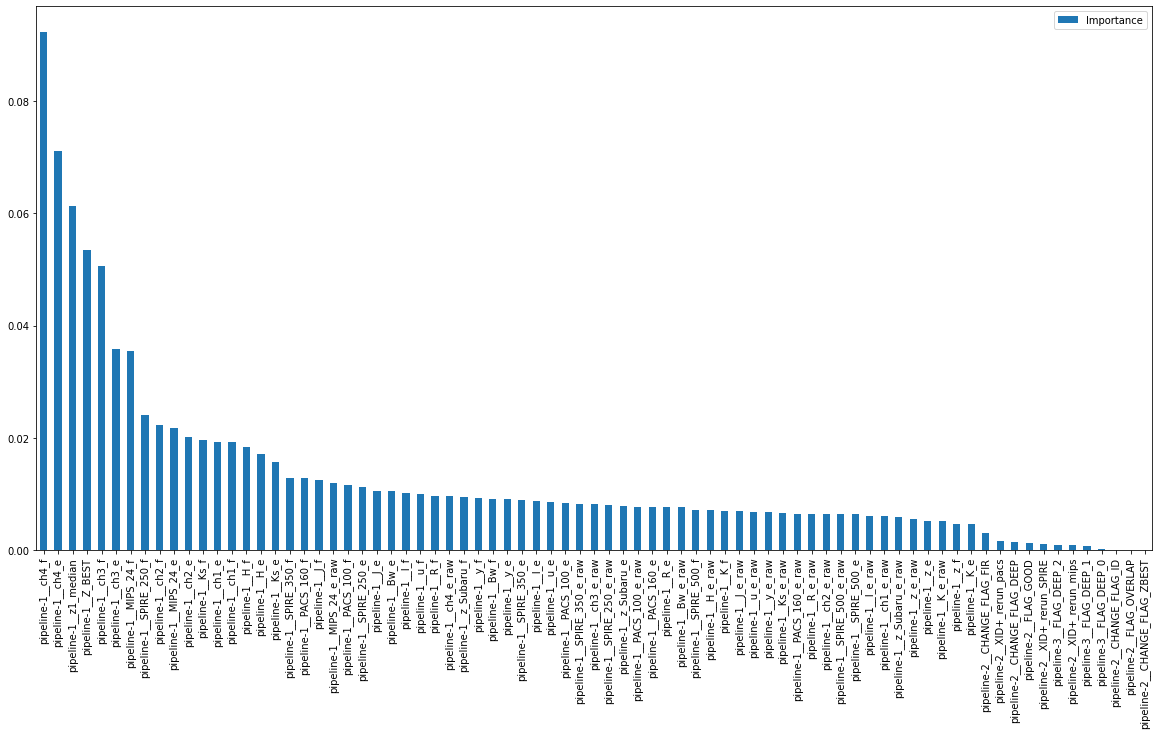

In [17]:
ax = random_forest_feature_importance.plot(kind='bar', figsize=(20,10))
ax.set_xticklabels(random_forest_feature_importance.Feature)
plt.plot()

## AGN Radio

In [20]:
RadioAGN_random_forest = RandomForestClassifier(n_estimators=100, class_weight="balanced")
RadioAGN_random_forest.fit(X_train, y_train["RadioAGN_final"])

RandomForestClassifier(class_weight='balanced')

In [21]:
labels = np.unique(y_train["RadioAGN_final"])

In [22]:
y_pred_Radio_AGN = RadioAGN_random_forest.predict(X_test)
print(accuracy_score(y_test["RadioAGN_final"], y_pred_Radio_AGN))

0.8864448204549727


[]

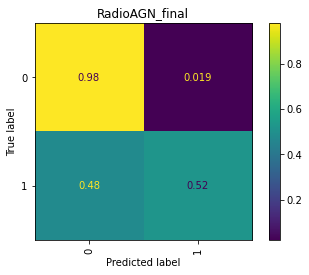

In [23]:
cm = confusion_matrix(y_test["RadioAGN_final"], y_pred_Radio_AGN, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.title("RadioAGN_final")
plt.plot()

In [24]:
random_forest_feature_importance = pd.DataFrame(
    np.array([preprocessor.get_feature_names_out(), RadioAGN_random_forest.feature_importances_]).T,
                                               columns=['Feature', 'Importance'])
random_forest_feature_importance = random_forest_feature_importance.sort_values(by=['Importance'], ascending=False)

[]

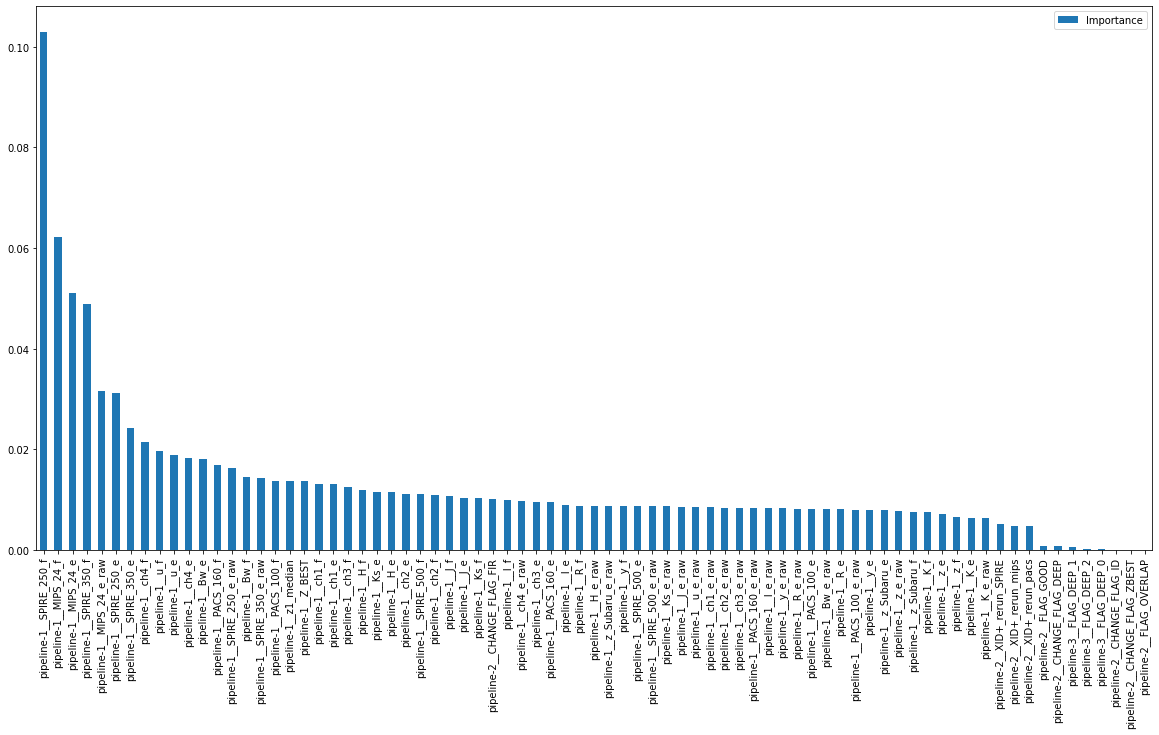

In [25]:
ax = random_forest_feature_importance.plot(kind='bar', figsize=(20,10))
ax.set_xticklabels(random_forest_feature_importance.Feature)
plt.plot()

## Combined

In [26]:
y_pred = pd.DataFrame(np.array([y_pred_AGN, y_pred_Radio_AGN]).T, columns=["AGN_final", "RadioAGN_final"])

In [27]:
def create_classification(row):
    """"
    The classification is currently given by 2 columns AGN_final, RadioAGN_final, this simply creates a single column
    for it, the classification works as follows

    AGN_final=0  &  RadioAGN_final=0     -> star-forming galaxy
    AGN_final=1  &  RadioAGN_final=0     -> 'radio-quiet' AGN
    AGN_final=0  &  RadioAGN_final=1     -> 'jet-mode' radio AGN / low-excitation radio galaxy
    AGN_final=1  &  RadioAGN_final=1     -> quasar-like radio AGN / high-excitation radio galaxy
    AGN_final=-1 or RadioAGN_final=-1    -> no secure classification

    non-secure classifications have already been removed.

    :param row: row containing data
    """
    if row['AGN_final'] == 0 and row['RadioAGN_final'] == 0:
        return 'star-forming galaxy'
    elif row['AGN_final'] == 1 and row['RadioAGN_final'] == 0:
        return 'radio-quiet AGN'
    elif row['AGN_final'] == 0 and row['RadioAGN_final'] == 1:
        return 'jet-mode radio AGN/low-excitation radio galaxy'
    elif row['AGN_final'] == 1 and row['RadioAGN_final'] == 1:
        return 'quasar-like radio AGN / high-excitation radio galaxy'

In [28]:
y_pred_classes = y_pred.apply(create_classification, axis=1)
y_test_classes = y_test.apply(create_classification, axis=1)

In [29]:
le = preprocessing.LabelEncoder()
y_pred_classes = le.fit_transform(y_pred_classes)
y_test_classes = le.transform(y_test_classes)

In [30]:
labels

array([0, 1], dtype=int64)

In [31]:
print(classification_report(y_test_classes, y_pred_classes, digits=4))

              precision    recall  f1-score   support

           0     0.8501    0.5694    0.6820       966
           1     0.6667    0.0161    0.0315       124
           2     0.7808    0.4766    0.5919       598
           3     0.8192    0.9711    0.8887      3631

    accuracy                         0.8203      5319
   macro avg     0.7792    0.5083    0.5485      5319
weighted avg     0.8170    0.8203    0.7978      5319



## Hyperparameter tuning

In [ ]:
# Metrics for hyperparameter tuning
metrics = {"Accuracy": "accuracy",
          "Balanced accuracy": "balanced_accuracy",
          "F1 score": "f1_weighted"}

In [ ]:
# Parameter space
parameters = {"n_estimators": [10,20,50,100,150,200],
             "criterion": ["gini", "entropy"],
             "max_depth": [10,30,50,70],
             "min_samples_split": [2,10,20],
             }

In [ ]:
random_forest = RandomForestClassifier()
clf = GridSearchCV(estimator=random_forest, 
                   param_grid=parameters,
                  scoring=metrics,
                  refit="Accuracy",
                  return_train_score=True,
                  n_jobs=-1,
                  cv=2,
                  verbose=4)

clf.fit(X_train, y_train)

In [ ]:
clf

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

# XGboost

In [61]:
model = XGBClassifier(use_label_encoder=False, max_depth=10)
model.fit(X_train, y_train["AGN_final"], early_stopping_rounds=10, eval_set=[(X_test, y_test["AGN_final"])], verbose=True)

[0]	validation_0-logloss:0.49962


C:\Users\jespe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.39295
[2]	validation_0-logloss:0.32540
[3]	validation_0-logloss:0.27928
[4]	validation_0-logloss:0.24884
[5]	validation_0-logloss:0.22827
[6]	validation_0-logloss:0.21409
[7]	validation_0-logloss:0.20482
[8]	validation_0-logloss:0.19860
[9]	validation_0-logloss:0.19441
[10]	validation_0-logloss:0.19135
[11]	validation_0-logloss:0.19062
[12]	validation_0-logloss:0.18911
[13]	validation_0-logloss:0.18817
[14]	validation_0-logloss:0.18794
[15]	validation_0-logloss:0.18739
[16]	validation_0-logloss:0.18739
[17]	validation_0-logloss:0.18763
[18]	validation_0-logloss:0.18710
[19]	validation_0-logloss:0.18716
[20]	validation_0-logloss:0.18793
[21]	validation_0-logloss:0.18855
[22]	validation_0-logloss:0.18837
[23]	validation_0-logloss:0.18962
[24]	validation_0-logloss:0.19005
[25]	validation_0-logloss:0.19091
[26]	validation_0-logloss:0.19130
[27]	validation_0-logloss:0.19196


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [62]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test["AGN_final"], y_pred))

0.9313780785862004


[]

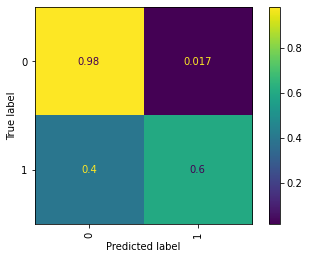

In [64]:
cm = confusion_matrix(y_test["AGN_final"], y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

# SVM

In [ ]:
clf = svm.SVC(C=10)
clf.fit(X_train, y_train["AGN_final"])

In [ ]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test["AGN_final"], y_pred))

[]

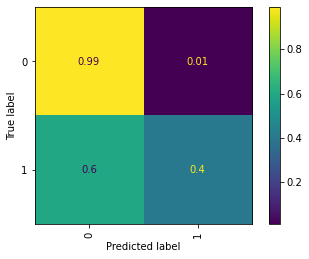

In [60]:
cm = confusion_matrix(y_test["AGN_final"], y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()